<a href="https://colab.research.google.com/github/cmason30/mouse-maze-vr/blob/main/master_sheet_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import math
from shapely.geometry import Point
from shapely.geometry import Polygon, LineString
from shapely.ops import linemerge, unary_union, polygonize
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Noah's Statistical Functions

In [42]:
### YTimeVisits ###
# Input: Dataframe
# Output: Array with total time per region (seconds) and number of visits per region (int)
# [[BaseTime, BaseVisits], [CenterTime, CenterVisits], [LeftTime, LeftVisits], [RightTime, RightVisits]]

def read_df(df): 
    return pd.read_csv(df,header=2, sep='\t')

def YTimeVisits (df):
  
  # BASE
  def FindTimeBase (df):
    # Create dataframe (df_base) with instances where y coordinates match boundaries
    df_base = df.loc[df['Position.Y'] > 13.925]
    # Reset index this new dataframe (df_base)
    df_base.reset_index(inplace=True)

    if df_base.index.size >= 1:
      numVisitsBase = 1
    else:
      numVisitsBase = 0

    # timeAllVisitsBase array will hold the the length of time for each visit the mouse
    # makes to Base
    timeAllVisitsBase = []
    timeVisitBase = 0
    timeEnterBase = df_base.iloc[0,1]

    numIndex = 0
    while numIndex < df_base.index.size:
      if (df_base.iloc[numIndex, 0] - df_base.iloc[(numIndex - 1), 0] > 1):
        timeVisitBase = df_base.iloc[(numIndex - 1), 1] - timeEnterBase
        timeAllVisitsBase.append(timeVisitBase)
        timeEnterBase = df_base.iloc[numIndex, 1]
        numVisitsBase += 1
      elif ((numIndex + 1) == df_base.index.size):
        timeVisitBase = df_base.iloc[(numIndex), 1] - timeEnterBase
        timeAllVisitsBase.append(timeVisitBase)
      numIndex += 1

    timeTotalBase = sum(timeAllVisitsBase)
    return timeTotalBase, numVisitsBase


  # CENTER
  def FindTimeCenter (df):
    # Create dataframe (df_center) with instances where x and y coordinates match boundaries
    df_center = df.loc[((df['Position.X'] < 5) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -5) & (df['Position.Y'] > -193.921)) |
                      ((df['Position.X'] < 10) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -10) & (df['Position.Y'] > -185.261)) |
                      ((df['Position.X'] < 15) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -15) & (df['Position.Y'] > -176.601)) |
                      ((df['Position.X'] < 20) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -20) & (df['Position.Y'] > -167.940)) | 
                      ((df['Position.X'] < 25) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -25) & (df['Position.Y'] > -159.280)) |
                      ((df['Position.X'] < 30) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -30) & (df['Position.Y'] > -150.620)) | 
                      ((df['Position.X'] < 35) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -35) & (df['Position.Y'] > -141.960)) |
                      ((df['Position.X'] < 40) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -40) & (df['Position.Y'] > -133.299)) |
                      ((df['Position.X'] < 45) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -45) & (df['Position.Y'] > -124.639)) |
                      ((df['Position.X'] < 50) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -50) & (df['Position.Y'] > -115.979)) | 
                      ((df['Position.X'] < 55) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -55) & (df['Position.Y'] > -107.318)) |
                      ((df['Position.X'] < 60) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -60) & (df['Position.Y'] > -98.658)) | 
                      ((df['Position.X'] < 65) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -65) & (df['Position.Y'] > -89.998)) |
                      ((df['Position.X'] < 70) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -70) & (df['Position.Y'] > -81.338)) |
                      ((df['Position.X'] < 75) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -75) & (df['Position.Y'] > -72.677)) |
                      ((df['Position.X'] < 80) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -80) & (df['Position.Y'] > -64.017)) | 
                      ((df['Position.X'] < 85) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -85) & (df['Position.Y'] > -55.357)) |
                      ((df['Position.X'] < 90) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -90) & (df['Position.Y'] > -46.696)) |
                      ((df['Position.X'] < 95) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -95) & (df['Position.Y'] > -38.036)) |
                      ((df['Position.X'] < 100) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -100) & (df['Position.Y'] > -29.376)) |
                      ((df['Position.X'] < 105) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -105) & (df['Position.Y'] > -20.716)) | 
                      ((df['Position.X'] < 110) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -110) & (df['Position.Y'] > -12.055)) |
                      ((df['Position.X'] < 115) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -115) & (df['Position.Y'] > -3.395)) |
                      ((df['Position.X'] < 120) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -120) & (df['Position.Y'] > 5.264)) | 
                      ((df['Position.X'] < 125) & (df['Position.Y'] < 13.925) & (df['Position.X'] > -125) & (df['Position.Y'] > 13.925))
    ]

    # Reset index this new dataframe (df_center)
    df_center.reset_index(inplace=True)
    if df_center.index.size >= 1:
        numVisitsCenter = 1
    else:
        numVisitsCenter = 0

    # timeAllVisitsCenter array will hold the the length of time for each visit the mouse
    # makes to Center
    timeAllVisitsCenter = []
    timeVisitCenter = 0
    timeEnterCenter = df_center.iloc[0,1] 

    numIndex = 0
    while numIndex < df_center.index.size:
      if (df_center.iloc[numIndex, 0] - df_center.iloc[(numIndex - 1), 0] > 1):
        timeVisitCenter = df_center.iloc[(numIndex - 1), 1] - timeEnterCenter
        timeAllVisitsCenter.append(timeVisitCenter)
        timeEnterCenter = df_center.iloc[numIndex, 1]
        numVisitsCenter += 1
      elif ((numIndex + 1) == df_center.index.size):
        timeVisitCenter = df_center.iloc[(numIndex), 1] - timeEnterCenter
        timeAllVisitsCenter.append(timeVisitCenter)
      numIndex += 1

    timeTotalCenter = sum(timeAllVisitsCenter)
    return timeTotalCenter, numVisitsCenter


  # LEFT
  def FindTimeLeft (df):
    # Create dataframe (df_left) with instances where x and y coordinates match boundaries
    df_left = df.loc[((df['Position.X'] < 0) & (df['Position.Y'] < -202.582)) | 
                      ((df['Position.X'] < -5) & (df['Position.Y'] < -193.921)) |
                      ((df['Position.X'] < -10) & (df['Position.Y'] < -185.261)) |
                      ((df['Position.X'] < -15) & (df['Position.Y'] < -176.601)) |
                      ((df['Position.X'] < -20) & (df['Position.Y'] < -167.940)) | 
                      ((df['Position.X'] < -25) & (df['Position.Y'] < -159.280)) |
                      ((df['Position.X'] < -30) & (df['Position.Y'] < -150.620)) | 
                      ((df['Position.X'] < -35) & (df['Position.Y'] < -141.960)) |
                      ((df['Position.X'] < -40) & (df['Position.Y'] < -133.299)) |
                      ((df['Position.X'] < -45) & (df['Position.Y'] < -124.639)) |
                      ((df['Position.X'] < -50) & (df['Position.Y'] < -115.979)) | 
                      ((df['Position.X'] < -55) & (df['Position.Y'] < -107.318)) |
                      ((df['Position.X'] < -60) & (df['Position.Y'] < -98.658)) | 
                      ((df['Position.X'] < -65) & (df['Position.Y'] < -89.998)) |
                      ((df['Position.X'] < -70) & (df['Position.Y'] < -81.338)) |
                      ((df['Position.X'] < -75) & (df['Position.Y'] < -72.677)) |
                      ((df['Position.X'] < -80) & (df['Position.Y'] < -64.017)) | 
                      ((df['Position.X'] < -85) & (df['Position.Y'] < -55.357)) |
                      ((df['Position.X'] < -90) & (df['Position.Y'] < -46.696)) |
                      ((df['Position.X'] < -95) & (df['Position.Y'] < -38.036)) |
                      ((df['Position.X'] < -100) & (df['Position.Y'] < -29.376)) |
                      ((df['Position.X'] < -105) & (df['Position.Y'] < -20.716)) | 
                      ((df['Position.X'] < -110) & (df['Position.Y'] < -12.055)) |
                      ((df['Position.X'] < -115) & (df['Position.Y'] < -3.395)) |
                      ((df['Position.X'] < -120) & (df['Position.Y'] < 5.264)) | 
                      ((df['Position.X'] < -125) & (df['Position.Y'] < 13.925))
    ]

    # Reset index in this new dataframe (df_left)
    df_left.reset_index(inplace=True)

    if df_left.index.size >= 1:
      numVisitsLeft = 1
    else:
      numVisitsLeft = 0

    # timeAllVisits array will hold the the length of time for each visit the mouse
    # makes to Left
    timeAllVisits = []
    timeVisit = 0
    timeEnterLeft = df_left.iloc[0,1] 
    
    # Iterate through the new structure and find how many visits the mouse makes to
    # Left and how long it stays there for each visit.
    numIndex = 0
    while numIndex < df_left.index.size:
      if (df_left.iloc[numIndex, 0] - df_left.iloc[(numIndex - 1), 0] > 1):
        timeVisit = df_left.iloc[(numIndex - 1), 1] - timeEnterLeft
        timeAllVisits.append(timeVisit)
        timeEnterLeft = df_left.iloc[numIndex, 1]
        numVisitsLeft += 1
      elif ((numIndex + 1) == df_left.index.size):
        timeVisit = df_left.iloc[(numIndex), 1] - timeEnterLeft
        timeAllVisits.append(timeVisit)
      numIndex += 1

    timeTotalLeft = sum(timeAllVisits)
    return timeTotalLeft, numVisitsLeft


  # RIGHT
  def FindTimeRight (df):
    # Create dataframe (df_right) with instances where x and y coordinates match boundaries
    df_right = df.loc[((df['Position.X'] > 0) & (df['Position.Y'] < -202.582)) | 
                      ((df['Position.X'] > 5) & (df['Position.Y'] < -193.921)) |
                      ((df['Position.X'] > 10) & (df['Position.Y'] < -185.261)) |
                      ((df['Position.X'] > 15) & (df['Position.Y'] < -176.601)) |
                      ((df['Position.X'] > 20) & (df['Position.Y'] < -167.940)) | 
                      ((df['Position.X'] > 25) & (df['Position.Y'] < -159.280)) |
                      ((df['Position.X'] > 30) & (df['Position.Y'] < -150.620)) | 
                      ((df['Position.X'] > 35) & (df['Position.Y'] < -141.960)) |
                      ((df['Position.X'] > 40) & (df['Position.Y'] < -133.299)) |
                      ((df['Position.X'] > 45) & (df['Position.Y'] < -124.639)) |
                      ((df['Position.X'] > 50) & (df['Position.Y'] < -115.979)) | 
                      ((df['Position.X'] > 55) & (df['Position.Y'] < -107.318)) |
                      ((df['Position.X'] > 60) & (df['Position.Y'] < -98.658)) | 
                      ((df['Position.X'] > 65) & (df['Position.Y'] < -89.998)) |
                      ((df['Position.X'] > 70) & (df['Position.Y'] < -81.338)) |
                      ((df['Position.X'] > 75) & (df['Position.Y'] < -72.677)) |
                      ((df['Position.X'] > 80) & (df['Position.Y'] < -64.017)) | 
                      ((df['Position.X'] > 85) & (df['Position.Y'] < -55.357)) |
                      ((df['Position.X'] > 90) & (df['Position.Y'] < -46.696)) |
                      ((df['Position.X'] > 95) & (df['Position.Y'] < -38.036)) |
                      ((df['Position.X'] > 100) & (df['Position.Y'] < -29.376)) |
                      ((df['Position.X'] > 105) & (df['Position.Y'] < -20.716)) | 
                      ((df['Position.X'] > 110) & (df['Position.Y'] < -12.055)) |
                      ((df['Position.X'] > 115) & (df['Position.Y'] < -3.395)) |
                      ((df['Position.X'] > 120) & (df['Position.Y'] < 5.264)) | 
                      ((df['Position.X'] > 125) & (df['Position.Y'] < 13.925))
    ]

    # Reset index this new dataframe (df_right)
    df_right.reset_index(inplace=True)

    if df_right.index.size >= 1:
        numVisitsRight = 1
    else:
        numVisitsRight = 0

    # timeAllVisitsRight array will hold the the length of time for each visit the mouse
    # makes to Right
    timeAllVisitsRight = []
    timeVisitRight = 0
    timeEnterRight = df_right.iloc[0,1] 

    numIndex = 0
    while numIndex < df_right.index.size:
      if (df_right.iloc[numIndex, 0] - df_right.iloc[(numIndex - 1), 0] > 1):
        timeVisitRight = df_right.iloc[(numIndex - 1), 1] - timeEnterRight
        timeAllVisitsRight.append(timeVisitRight)
        timeEnterRight = df_right.iloc[numIndex, 1]
        numVisitsRight += 1
      elif ((numIndex + 1) == df_right.index.size):
        timeVisitRight = df_right.iloc[(numIndex), 1] - timeEnterRight
        timeAllVisitsRight.append(timeVisitRight)
      numIndex += 1

    timeTotalRight = sum(timeAllVisitsRight)
    return timeTotalRight, numVisitsRight


  # Array that will be outputted
  # Output will be in the Format of:
  # [[BaseTime, BaseVisits], [CenterTime, CenterVisits], [LeftTime, LeftVisits], [RightTime, RightVisits]]
  yMazeOutput = []

  baseData = FindTimeBase(df)
  yMazeOutput.append(baseData)

  centerData = FindTimeCenter(df)
  yMazeOutput.append(centerData)

  leftData = FindTimeLeft(df)
  yMazeOutput.append(leftData)

  rightData = FindTimeRight(df)
  yMazeOutput.append(rightData)

  # Output Array
  return yMazeOutput




In [43]:
### AverageVelocity ###
# Input: Dataframe
# Output: Float Value of average velocity throughout entire simulation (cm/sec)
def AverageVelocity (df):
  # Find Total Path Length
  totalPathLength_cm = 0

  currIndex = 0
  while currIndex < (df.index.size - 1):
    nextIndex = (currIndex + 1)

    # a equals difference in x values
    a = df.iloc[currIndex, 2] - df.iloc[nextIndex, 2]
    aSquared = math.pow(a, 2)

    # b equals difference in y values
    b = df.iloc[currIndex, 3] - df.iloc[nextIndex, 3]
    bSquared = math.pow(b, 2)

    # Calculate length traveled in interval, and add to pathLength
    tempLength_cm = math.sqrt(aSquared + bSquared)
    totalPathLength_cm += tempLength_cm
    currIndex += 1


  # Find Total Time
  totalTime_sec = df.iloc[(df.index.size - 1), 0]

  # Find Average Velocity
  avgVel_cm_sec = totalPathLength_cm / totalTime_sec

  return avgVel_cm_sec






In [44]:
### TwitchScores ###
# Input: df
# Output: Array of twitch scores for movement
def TwitchScores (df):
  # Returns the shortest, straightest path length between two consecutive reward instances
  def FindTheoreticalPathLength (a, b):
    totalPathLength = 0
    # a equals difference in x values
    aSquared = math.pow(a, 2)

    # b equals difference in y values
    bSquared = math.pow(b, 2)

    # Calculate length traveled in interval, and add to pathLength
    theoreticalPathLength = math.sqrt(aSquared + bSquared)

    return theoreticalPathLength

  # Calculate instantaneous velocities for each interval, find the differences of
  # consecutive velocities, and averages these differences to calculate Twitch Score

  twitchScores = []
  instVelocities = []
  instVelocitiesDiff = []

  currIndex = 1
  while currIndex < (df.index.size - 1):
    if ((df.iloc[currIndex, 1] == "Nose Poke") or (currIndex == df.index.size - 2)):
      nosePoke = True

      # Find Difference of Consecutive instVelocities, then Append Difference to instVelocitiesDiff Array
      numElement = 1
      while numElement < len(instVelocities):
        instVelocityDiff = abs(instVelocities[numElement] - instVelocities[numElement - 1])
        instVelocitiesDiff.append(instVelocityDiff)
        numElement += 1

      # twitchScore Equals the Mean Difference of Consecutive instVelocities
      twitchScore = np.mean(instVelocitiesDiff)
      twitchScores.append(twitchScore)
      instVelocities.clear()
      instVelocitiesDiff.clear()

      # Loop Through Remainder of "Nose Poke" Interval
      currIndex += 1
      while nosePoke:
        if df.iloc[currIndex, 1] == "Nose Poke":
          currIndex += 1
        else:
          nosePoke = False

    else:
      # Calculate Path Length
      prevIndex = (currIndex - 1)
      a = df.iloc[currIndex, 2] - df.iloc[prevIndex, 2]
      b = df.iloc[currIndex, 3] - df.iloc[prevIndex, 3]
      pathLength = FindTheoreticalPathLength(a, b)

      # Calculate Time Interval
      time = df.iloc[currIndex, 0] - df.iloc[prevIndex, 0]

      # Calculate Instantaneous Velocity
      instVelocity = pathLength / time
      instVelocities.append(instVelocity)

      currIndex += 1

  return tuple(twitchScores)

  




In [45]:
### PathExcessRatios ###
# Input: Dataframe
# Output: Array of Path Excess Ratios between "Nose Poke" Instances
def PathExcessRatios (df):
  # Returns the actual path length between two indices in the data
  # Used in calculating path excess ratio
  def FindActualPathLength (startIndex, endIndex):
    actualPathLength = 0
    currIndex = startIndex
    while currIndex < endIndex:
      nextIndex = (currIndex + 1)

      # a equals difference in x values
      a = df.iloc[currIndex, 2] - df.iloc[nextIndex, 2]
      aSquared = math.pow(a, 2)

      # b equals difference in y values
      b = df.iloc[currIndex, 3] - df.iloc[nextIndex, 3]
      bSquared = math.pow(b, 2)

      # Calculate length traveled in interval, and add to actualPathLength
      tempLength = math.sqrt(aSquared + bSquared)
      actualPathLength += tempLength
      currIndex += 1
    
    return actualPathLength

  # Returns the shortest, straightest path length between two consecutive reward instances 
  # Only works for Circle, Corridor, and Square Maze (not appropriate for Y Maze)
  def FindTheoreticalPathLength (a, b):
    totalPathLength = 0
    # a equals difference in x values
    aSquared = math.pow(a, 2)

    # b equals difference in y values
    bSquared = math.pow(b, 2)

    # Calculate length traveled in interval, and add to pathLength
    theoreticalPathLength = math.sqrt(aSquared + bSquared)

    return theoreticalPathLength

  # Find the ratio of actual path length divided by theoretical path length
  # Return an array of path excess ratios 
  beginWalkingIndex = 0
  endWalkingIndex = 0
  pathExcessRatios = []
  currIndex = 0
  while currIndex < (df.index.size - 1):
    if ((df.iloc[currIndex, 1] == "Nose Poke") or (currIndex == df.index.size - 2)):
      nosePoke = True
      endWalkingIndex = currIndex
        
      # Calculate Actual Path:
      actualPathLength = FindActualPathLength(beginWalkingIndex, endWalkingIndex)

      # Calculate Theoretical Path:
      a = df.iloc[endWalkingIndex, 2] - df.iloc[beginWalkingIndex, 2]
      b = df.iloc[endWalkingIndex, 3] - df.iloc[beginWalkingIndex, 3]
      theoreticalPathLength = FindTheoreticalPathLength(a, b)
          
      # Calculate Ratio
      pathExcessRatio = actualPathLength / theoreticalPathLength
      pathExcessRatios.append(pathExcessRatio)
          
      currIndex += 1
      while nosePoke:
        if df.iloc[currIndex, 1] == "Nose Poke":
          currIndex += 1
        else:
          nosePoke = False
      beginWalkingIndex = currIndex
    else:
      currIndex += 1

  return tuple(pathExcessRatios)

# Colin's Functions

Coordinates

In [7]:
ymaze_coords = np.array([[-433.013, -452.582],
                         [0,-202.582],
                         [433.013, -452.582],
                         [558.013, -236.075],
                         [125, 13.925],
                         [125, 513.924],
                         [-125, 513.924],
                         [-125, 13.925],
                         [-558.013, -236.075]])


sq_coords = np.array([[750,-750],
                      [-750, -750],
                      [-750, 750],
                    [750, 750]])

circle = 750

corr_coords = np.array([[-75, -1332.286],
                        [-75, 1332.286],
                        [75, 1332.286],
                        [75, -1332.286]])

Distance from Nearest Wall

In [8]:
def mouse_edge_distance(df, maze_coordinates, distance_threshold=35):

  df_test = pd.read_csv(df,header=2, sep='\t')

  if isinstance(maze_coordinates, int):
    p = Point(0, 0)
    polygon_maze = p.buffer(maze_coordinates)

  else:
    polygon_maze = Polygon(maze_coordinates)

  df_test["mouse_dist"] = df_test.apply(lambda row: polygon_maze.exterior.distance(Point(row["Position.X"], row["Position.Y"])), axis=1)
  df_test['distance_marked'] = df_test.apply(lambda row: 1 if distance_threshold >= row['mouse_dist'] else 0, axis=1)

  return df_test

# Master Sheet Generator

In [9]:
# Inputs: 

# df_path: Give the file path of the behavioral file of interest. 
# maze_array: Give one of four strings( 'square', 'circle', 'ymaze', 'corridor') based on the maze that the behavior file ran on
# master_path: Give the file path of the master sheet so that the new data being generated in this function appends to it. If generating
# a new master sheet, then just leave as None

# Outputs a dataframe with the comprehensive data from the statistical functions above

def mouse_farm(df_path, maze_array, master_path=None):

# Reads in file and file path name as variables
  mouse_df = pd.read_csv(df_path,header=2, sep='\t')
  file_path = pd.read_csv(df_path).iloc[0,0]


# NumPy arrays of maze types
  if maze_array == 'square':
    coords =  np.array([[750,-750],
                        [-750, -750],
                        [-750, 750],
                        [750, 750]])
    
  elif maze_array == 'circle':
    coords = 750

  elif maze_array == 'ymaze':
    coords =  np.array([[-433.013, -452.582],
                        [0,-202.582],
                        [433.013, -452.582],
                        [558.013, -236.075],
                        [125, 13.925],
                        [125, 513.924],
                        [-125, 513.924],
                        [-125, 13.925],
                        [-558.013, -236.075]])
    
  elif maze_array == 'corridor':
    coords = np.array([[-75, -1332.286],
                       [-75, 1332.286],
                       [75, 1332.286],
                       [75, -1332.286]])
    
  else:
    print('Give a valid shape type.')

# var dict gives the first few columns of the dataframe as keys in this dictionary
  var_dict = {'avg_vel': AverageVelocity(mouse_df), 'twitch_score': [TwitchScores(mouse_df)], 'mazetype': maze_array, 'file_path': file_path}

# Given the different outputs for the ymaze we will have different column outputs for the dataframe as seen in the dictionary below
  if maze_array == 'ymaze':

    y_visits = YTimeVisits(mouse_df)

    y_dict = {'base_time': y_visits[0][0], 'base_visits': y_visits[0][1], 'center_time': y_visits[1][0],
              'center_visits': y_visits[1][1], 'left_time': y_visits[2][0], 'left_visits': y_visits[2][1],
              'right_time': y_visits[3][0], 'right_visits': y_visits[3][1], 'path_excess_ratio': np.nan}
    var_dict.update(y_dict)

# All other maze types are given outputs in the else statement
  else:
    y_blank = {'base_time': np.nan, 'base_visits': np.nan, 'center_time': np.nan,
              'center_visits': np.nan, 'left_time': np.nan, 'left_visits': np.nan,
              'right_time': np.nan, 'right_visits': np.nan,  'path_excess_ratio': [PathExcessRatios(mouse_df)]}

    var_dict.update(y_blank)

# var_dict ends up being the final concatenated dictionary for all of the columns in the master df
# var_sheet_df turns it into a dataframe
  var_sheet_df = pd.DataFrame(var_dict)

# Mouse edge distance and file_path are added last and then merged to the var_sheet_df dataframe using file_path as the unique key
  time_sheet_df = mouse_edge_distance(df_path, coords)
  time_sheet_df['file_path'] = file_path

  data_df = time_sheet_df.merge(var_sheet_df, on='file_path')

# Conditional if given master sheet path, then the output is appended, else it just generates a new sheet
# We should add a conditional unique that it won't append if the file_path string is already in the master sheet as to not double up on data
  if master_path is not None:
    master_df = pd.read_csv(r'master_df_path')

    return master_df.append(data_df)

  return data_df


# Testing Environment (Messy Area)

Testing Master Sheet Code

In [ ]:
mouse_farm('square.behavior', 'square')

In [ ]:
mouse_farm('ymaze.behavior', 'ymaze')
#mouse_farm('square.behavior', 'square').to_csv(r'/content/master_output_square.csv')

Trying Out a New Time In Region Function (With Visualizations)

In [33]:
def y_maze_time_spent(behavioral_filepath):

  top = Polygon(LineString([(-125, 513.924), (-125, 13.925), (125, 13.925), (125, 513.924), (-125, 513.924)]))
  center = Polygon(LineString([(0,-202.582), (-125, 13.925), (125, 13.925), (0,-202.582)]))
  left = Polygon(LineString([(-125, 13.925), (-558.013, -236.075), (-433.013, -452.582), (0,-202.582), (-125, 13.925)]))
  right = Polygon(LineString([(125, 13.925), (558.013, -236.075), (433.013, -452.582), (0,-202.582), (125, 13.925)]))

  ymaze_mouse = pd.read_csv(behavioral_filepath, header=2, sep='\t')
  df_regions = pd.DataFrame(ymaze_mouse['#Snapshot Timestamp'])
  df_regions['time_diff'] = df_regions['#Snapshot Timestamp'].diff()

  regions_dict = {'top': top, 'center': center, 'left': left, 'right': right}
  time_spent_region = {}

  for key, value in regions_dict.items():
    df_regions[key] = ymaze_mouse.apply(lambda row: value.contains(Point(row["Position.X"], row["Position.Y"])), axis=1)
    time_spent_region[key] = df_regions[df_regions[key] == True]['time_diff'].sum()

  return time_spent_region, ymaze_mouse

  


In [52]:
df_test = y_maze_time_spent('/content/8007_OF_Habituation.behavior')

In [53]:
df_test[0]

{'center': 0.9072275999999999,
 'left': 24.688999999999997,
 'right': 0.0,
 'top': 1.6969999999999743}

In [54]:
df_test[1]

,#Snapshot Timestamp,Trigger Region Identifier,Position.X,Position.Y,Position.Z,Forward.X,Forward.Y,Forward.Z
0,0.041371,NaN,-0.000008,0.000000,46.2513,5.960460e-08,-1.000000,0
1,0.197919,NaN,-0.000008,0.000000,46.2513,5.960460e-08,-1.000000,0
2,0.220103,NaN,-0.000008,-0.064503,46.2513,-2.652560e-02,-0.999648,0
3,0.248659,NaN,-0.011853,-0.574928,46.2513,-2.513030e-02,-0.999684,0
4,0.273717,NaN,-0.054735,-2.308350,46.2513,-2.233870e-02,-0.999750,0
...,...,...,...,...,...,...,...,...
14298,599.835000,NaN,469.044000,-645.942000,46.2500,-8.862050e-01,-0.463292,0
14299,599.879000,NaN,469.044000,-645.942000,46.2500,-8.862050e-01,-0.463292,0
14300,599.921000,NaN,469.044000,-645.942000,46.2500,-8.862050e-01,-0.463292,0
14301,599.963000,NaN,469.044000,-645.942000,46.2500,-8.862050e-01,-0.463292,0


In [40]:
coords =  np.array([[750,-750],
                      [-750, -750],
                      [-750, 750],
                    [750, 750]])


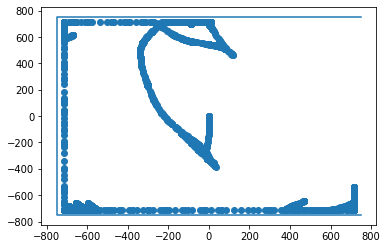

In [41]:
plt.plot(coords[:,0], coords[:,1])
plt.scatter(df_test['Position.X'], df_test['Position.Y'])
plt.show()



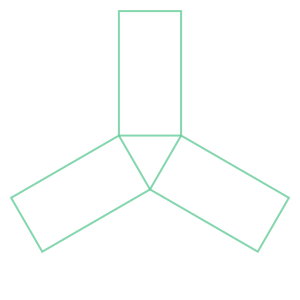

In [32]:
line = [LineString([(0,-202.582), (-125, 13.925), (125, 13.925), (0,-202.582)])]
polygon_maze = Polygon(np.array([[-433.013, -452.582],
                         [0,-202.582],
                         [433.013, -452.582],
                         [558.013, -236.075],
                         [125, 13.925],
                         [125, 513.924],
                         [-125, 513.924],
                         [-125, 13.925],
                         [-558.013, -236.075]]))
line.append(polygon_maze.boundary)
line = unary_union(line)
line = linemerge(line)
polygons = polygonize(line)

line